In [99]:
import numpy as np
import pandas as pd
import os
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('../runs/results.csv')
df = df.replace({'apply_patch': 'True', 'random_patch': 'True'}, 1)
df = df.replace({'apply_patch': 'False', 'random_patch': 'False'}, 0)
for col in ['apply_patch', 'random_patch']:
    df[col] = df[col].astype(float).astype(bool)

# transforms_applied = [None] + [(True, True)] * 4 +  [(False, True)] * 4 + [(True, False)] * 2 + [(False, False)] * 1
# df['(transform, relighting) when testing patch'] = transforms_applied
# df[['fnr_octagon', 'num_octagon_labels', 'num_octagon_with_patch', 'fn_octagon', 'apply_patch', 'generate_patch', 'rescaling', 'relighting', '(transform, relighting) when testing patch']]

df[['fnr_octagon', 'num_octagon_labels', 'num_octagon_with_patch', 'fn_octagon', 'apply_patch', 'generate_patch', 'rescaling', 'relighting']]

# 0     -> no patch on stop signs
# 1-4   -> rp2 patch WITH transform and WITH relighting
# 5-8   -> rp2 patch WITHOUT transform and WITH relighting
# 9-10  -> rp2 patch WITH transform and WITHOUT relighting
# 10-11 -> rp2 patch WITHOUT transform and WITHOUT relighting

# generate_patch == 'synthetic' -> means the patch was GENERATED on the synthetic dataset
# rescaling == True -> means the stop signs were resized during patch GENERATION
# relighting == True -> means the stop signs were relighted (changed brightness and contrast) during patch GENERATION

,fnr_octagon,num_octagon_labels,num_octagon_with_patch,fn_octagon,apply_patch,generate_patch,rescaling,relighting
0,0.213559,885.0,571.0,189.0,True,transform,0.0,0.0
1,0.218079,885.0,571.0,193.0,True,transform,False,False
2,0.206545,885.0,0.0,183.0,False,NaN,NaN,NaN
3,0.213559,885.0,571.0,189.0,True,transform,False,False
4,0.218079,885.0,571.0,193.0,True,transform,False,False
5,0.206545,885.0,0.0,183.0,False,NaN,NaN,NaN
6,0.212429,885.0,571.0,188.0,True,transform,False,False
7,0.213559,885.0,571.0,189.0,True,transform,False,False
8,0.212429,885.0,571.0,188.0,True,transform,False,False
9,0.206545,885.0,0.0,183.0,False,NaN,NaN,NaN


In [104]:
f = open('../runs/val/exp/bg_filenames.txt', 'r')
lines = f.readlines()
bg_filenames = [x.strip('\n') for x in lines]
print(bg_filenames)


df_results_per_label_no_patch = pd.read_csv('../runs/val/exp_mapillary_no_patch_2/results_per_label.csv')
df_results_per_label_rp2_patch = pd.read_csv('../runs/val/exp_mapillary_rp2_patch_7/results_per_label.csv')

merged_df = df_results_per_label_no_patch.merge(df_results_per_label_rp2_patch, on=['filename', 'obj_id', 'sign_width', 'sign_height'], suffixes=['_no_patch', '_patch'])
assert len(merged_df) == len(df_results_per_label_rp2_patch) & len(merged_df) == len(df_results_per_label_no_patch)
merged_df['fn'] = merged_df['correct_prediction_no_patch'] - merged_df['correct_prediction_patch']
merged_df = merged_df.sort_values(by=['fn', 'filename'], ascending=[False, True])
merged_df
# successful_attack_filenames = set(merged_df[merged_df['change_in_fn'] > 0]['filename'])
# len(successful_attack_filenames_2)

# merged_df[merged_df['filename'].isin(bg_filenames)]

merged_df['avg_sign_dim'] = (merged_df['sign_width'] + merged_df['sign_height'])/2
merged_df

['36iNN_5lKC_CrOiFjmcF9w.jpg', 'SFhuI4R6dyCdgwFYmMeg7A.jpg', 'T0kvHFtwoqL3HH44FpBzOg.jpg', '_69EblZbqXUcjYKu7myKDg.jpg', 'U6RnrAjXMMBCX4SDEnUScQ.jpg', 'L5NvEU03Y-m2-yWSaqj3Kg.jpg', 'Q3eC_uZh20VujxdQ1ttzRA.jpg', 'Q6I4zxMM376kjtWRy27o3A.jpg', '8lkcFc59-2RgSU203mlYEQ.jpg', 'PCWhGiFuCVMfrfY7sE1h7g.jpg', 'P_WQcMdizCDIHm3VSYACLw.jpg', '8CvaYyTKsEQ6lI8DysjvyQ.jpg', 'qNYV4-JVTJ-Tw8Q-_0nvdQ.jpg', '5dDIWi7JP6u_MFChxq-m_g.jpg', '_sGId2p9jcFDwTPcQ6TQdw.jpg', '_iN9KqCNguVQqoSlHTSAbA.jpg', 'Si6WGCLGvBfF678M_tH6Xg.jpg', 'tmcaSU6QOruX3VfaiBFcNg.jpg', '5-c8RAFQovjJS6TeKV2ANA.jpg', 'SOlz2Z5KJkaOqDuCrHVtNA.jpg']


,filename,obj_id,label_no_patch,correct_prediction_no_patch,sign_width,sign_height,label_patch,correct_prediction_patch,fn,avg_sign_dim
632,5UIDjjCd-ZX6kIIlUIqY-A.jpg,0.0,14.0,1,27.058838,29.803955,14.0,0,1,28.431396
10,8lkcFc59-2RgSU203mlYEQ.jpg,5.0,14.0,1,79.333344,70.666687,14.0,0,1,75.000015
115,UnELXCQpTYbV3hBGoTxk0A.jpg,9.0,14.0,1,13.253021,13.493958,14.0,0,1,13.373489
243,ZRJFX8E6ls076pkO1-_mqg.jpg,6.0,14.0,1,32.941223,34.117676,14.0,0,1,33.529449
224,d92vfVMBszm48oCGbhmOvA.jpg,0.0,14.0,1,11.384583,16.615295,14.0,0,1,13.999939
...,...,...,...,...,...,...,...,...,...,...
355,zlBhA3i-2K56Erd0RSnnFw.jpg,4.0,14.0,0,24.444397,27.936523,14.0,0,0,26.190460
354,zpOQfvo3deAc_qQK7yssjw.jpg,1.0,14.0,1,11.887549,11.566345,14.0,1,0,11.726947
769,zzhOz5HCLGgV390zmYjyjQ.jpg,0.0,14.0,1,50.476257,47.619080,14.0,1,0,49.047668
635,5i9qEqPya01LmgzMK1knzA.jpg,1.0,14.0,0,26.666748,27.058838,14.0,1,-1,26.862793


In [107]:
# checking results per label are correct
df_results_per_image = pd.read_csv('../runs/val/exp_mapillary_rp2_patch_7/results_per_image.csv')
print(np.sum(df_results_per_image['fn']))

print(len(df_results_per_label_rp2_patch) - np.sum(df_results_per_label_rp2_patch['correct_prediction']))


188

In [108]:
np.sum(merged_df['fn'])

5

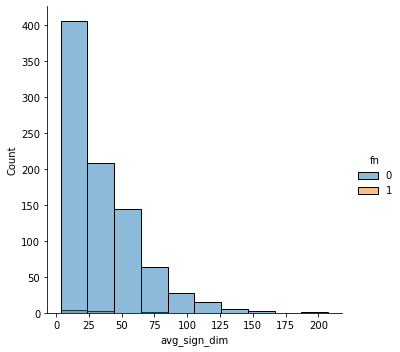

In [109]:
merged_df = merged_df[merged_df['fn'] >= 0]
sns.displot(data=merged_df, x="avg_sign_dim", hue='fn', bins=10)

<AxesSubplot:xlabel='sign_width', ylabel='sign_height'>

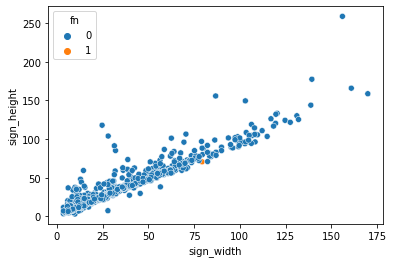

In [81]:
merged_df = merged_df[merged_df['fn'] >= 0]
sns.scatterplot(x='sign_width', y='sign_height', data=merged_df, hue='fn')